In [38]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [39]:
excel_file_path = "/media/Datacenter_storage/Ji/BiomedParse/runs/matched_unmatched/20251208_094305/false_positive_preds.xlsx"
df = pd.read_excel(excel_file_path)
series = df['distance_fp_csf']
series = pd.to_numeric(series, errors='coerce')
print(series)

max_num = int(series.max())
min_num = int(series.min())
series_rounded = series.round().astype(int)
print(series_rounded)

0      2.236068
1      5.099020
2      1.000000
3      0.000000
4      1.000000
         ...   
488    1.000000
489    0.000000
490    1.000000
491    1.000000
492    1.000000
Name: distance_fp_csf, Length: 493, dtype: float64
0      2
1      5
2      1
3      0
4      1
      ..
488    1
489    0
490    1
491    1
492    1
Name: distance_fp_csf, Length: 493, dtype: int64


In [40]:
bin_0_10 = list(range(0,11))
bin_11_ = list(range(10, (max_num//10 + 2) * 10, 20))
bins = bin_0_10 + bin_11_[1:]

binned = pd.cut(series, bins, right=False)
counts = binned.value_counts().sort_index()

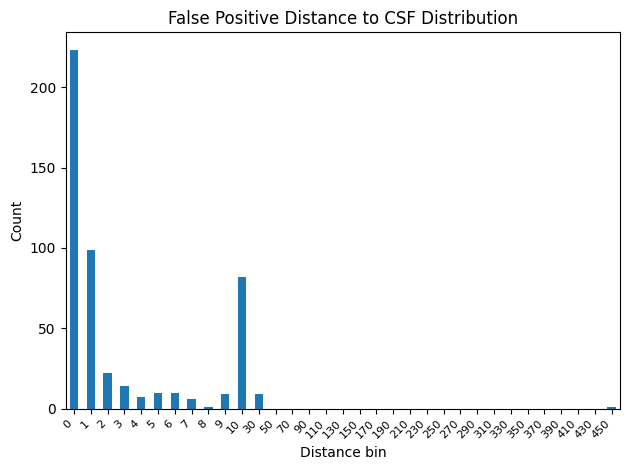

In [41]:
ax = counts.plot(kind="bar")
labels = [f"{int(interval.left)}" for interval in counts.index]
ax.set_xticklabels(labels, rotation=45, ha="right", fontsize=8)

plt.xlabel("Distance bin")
plt.ylabel("Count")
plt.title("False Positive Distance to CSF Distribution")
plt.tight_layout()
plt.show()